In [15]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

# CFG PROJECT PRESENTATION
<img src="cfg_logo.png" width="250" height="250" align="right"/>




### Helena Blackmore
#### Group 1

# SALES




<img src="sales_screenshot.png" width="300" height="300" align="right"/>
<img src="project_screenshot.png" width="500" height="500" align="left"/>

In [1]:
import pandas as pd
import csv
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# reading dataset and creating two lists: months, sales

with open('PycharmProjects\pythonProject\cfg-project\sales.csv', 'r') as csv_file:  
    spreadsheet = csv.DictReader(csv_file)
    sales = []
    year = []

    
    for row in spreadsheet:               #creates a list of sales
        sale = int(row['sales'])
        month_name = row['month']
        
        sales.append(sale)
        year.append(month_name)

In [5]:
#calculating total,maximum, minimum and mean
total=sum(sales)
total_months=len(sales)

max_sale=max(sales)
max_index=sales.index(max_sale)
max_month=year[max_index]

min_sale=min(sales)
min_index=sales.index(min_sale)
min_month=year[min_index]

mean_sale=round(numpy.mean(sales),2)

#printing out all results
print("the total sales in {} months were : £{}".format(total_months,total))
print("the highest sales were in {}:£{}".format( max_month, max_sale))
print("the lowest sale were in {}: £{} ".format(min_month,min_sale))
print("the average sale was:£{}".format(mean_sale))

the total sales in 12 months were : £45542
the highest sales were in jul:£7479
the lowest sale were in feb: £1521 
the average sale was:£3795.17


# Calculating % change 

- i.e. sales % increase or decrease relative to previous months sales

<img src="stupid.jpg" width="250" height="250" align="center"/>

# does not work !

In [ ]:
# # doesn't work
        per_change=[]
        for row in spreadsheet:               #creates a list of sales
          change = (int(row['sales'])/int((row-1)['sales'])-1)
          if row=="jan":
            continue
          per_change.append(change)

In [ ]:
#doesn't work

    i=1
    per_change=[]

    while i<=len(sales):
      change= ((int(sales[i])/int(sales[i-1])-1)*100
      i=i+1
      per_change.append(change)
print(per_change)

# solution

In [37]:
df = pd.read_csv('PycharmProjects\pythonProject\cfg-project\sales.csv')

#using loc to identify columns and rows to calculate value of a new variable

for i in range(1, len(sales)):
   df.loc[i, 'change %'] = ((df.loc[i, 'sales'] / df.loc[i-1, 'sales'])-1)*100 

df.head() #shows first 5 rows - to check if code worked

,year,month,sales,expenditure,change %
0,2018,jan,6226,3808,NaN
1,2018,feb,1521,3373,-75.570190
2,2018,mar,1842,3965,21.104536
3,2018,apr,2051,1098,11.346363
4,2018,may,1728,3046,-15.748415


# let's visualise the data!

# sales over the year compared to average sales

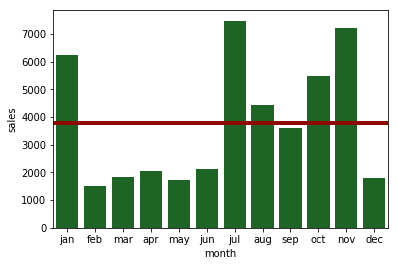

In [35]:
#sns.set_theme(style="whitegrid")    #runs outside jupyter: issue with seaborn version

###### 1. simple barchart:sales and mean sale

# simple bar chart of the sales
sns.set_color_codes("dark")
plot1=sns.barplot(x="month", y="sales", data=df,
            label="sales", color="g")
plot1.axhline(mean_sale, color="r", linewidth=4) #adds a line: value of a mean sale

plt.show()

# what about change?

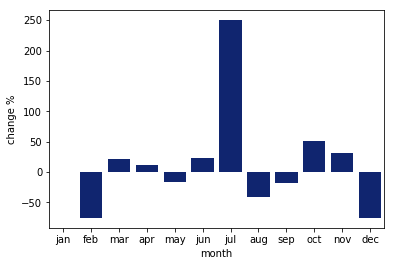

In [36]:
sns.set_color_codes("dark")
plot1=sns.barplot(x="month", y="change %", data=df,
            label="change %", color="b")

plt.show()

# plot with two y axes:
## plotting sales, expenditure and change in sales

In [ ]:
# plotting both sales and expenditure
## transforming data fromwide to long
df_long=pd.melt(
    frame=df,
    id_vars=["year","month","change %"],
    var_name="sales/expenditure",
    value_name="amount" )

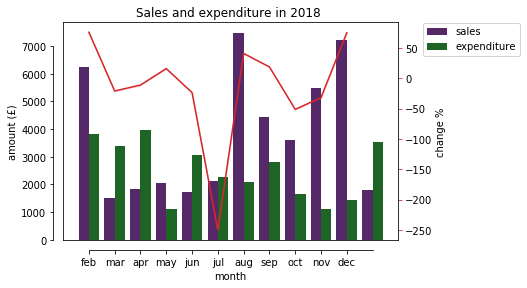

In [13]:

# Draw a nested barplot to show expenditure next to sales
ax1=sns.barplot(x="month", y="amount",
            hue="sales/expenditure", palette=["m", "g","b"],
            data=df_long)
sns.despine(offset=10, trim=True)
plt.ylabel("amount (£)")
ax1.set_xlabel('month')
ax1.set_ylabel("amount (£)")
ax1.tick_params(axis='y')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1.1),borderaxespad=2.2)
plt.title("Sales and expenditure in 2018 ")
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('change in sales %')
ax2 = sns.lineplot(x='month', y='change %', data = df_long, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# what about net profit?

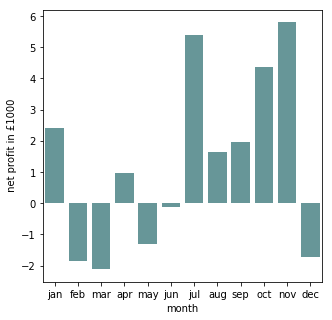

In [28]:
#creating a new variable
df['profit']=(df['sales']-df['expenditure'])/1000

#plot net profit
f, ax = plt.subplots(figsize=(5, 5))
# simple bar chart of net profit
plot1=sns.barplot(x="month", y="profit", data=df,
            label="net profit", color="cadetblue")
plt.ylabel(" net profit in £1000")
plt.show()

# COVID-19: VACCINATION PROGRESS
# 
 - download a dataset from kaggle
 - download country/world boundaries data
 - merge the dataset to visualise the data as a map
 - use pandas and geopandas to plot data on a map
    


In [ ]:
#! pip install researchpy
#! pip install geopandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import researchpy as rp
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import geopandas

#vaccination data
vac_data=pd.read_csv("PycharmProjects\pythonProject\cfg-project\sales.csv")

    #will display all rows when printed: I need this to see names of countries 
    #(UK or United kingdom or united_kingdom...you get the jist)
#pd.set_option('display.max_rows', None) 


# vaccination progress in UK

In [ ]:
#plot

uk_countries=["England", "Scotland", "Wales", "Northern Ireland", "United Kingdom"]

subset_uk= vac_data[vac_data.country.isin(uk_countries)]
subset_uk.shape

subset_uk["people_vaccinated_permil"] = subset_uk["people_vaccinated"] * 0.000001

sns.set_theme(style="whitegrid")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(7, 5))

# Generate plot
sns.barplot(x="country", 
            y="people_vaccinated_permil", 
            palette="colorblind", 
            data=subset_uk,
            label="people vaccinated",
            ax=ax1, 
            ci=None,
            order=["United Kingdom","England", "Scotland", "Wales", "Northern Ireland"])
ax1.set_ylabel("people vaccinated")
plt.title("Total number of vaccinated people in the UK (in millions)")

![](uk_bar_total.png)

In [21]:
#uk people vaccinated per unit of population
#use total number of people vaccinated per hundred


subset_uk= vac_data[vac_data.country.isin(uk_countries)]
subset_uk.shape

sns.set_theme(style="whitegrid")
#vac_data.head()

f, ax2 = plt.subplots(figsize=(7, 5))

# Generate plot
sns.barplot(x="country", 
            y="people_vaccinated_per_hundred", 
            palette="colorblind", 
            data=subset_uk,
            label="people vaccinated",
            ax=ax2, 
            ci=None,
            order=["United Kingdom","England", "Scotland", "Wales", "Northern Ireland"])
ax2.set_ylabel("% of population vaccinated")
plt.title("% of vaccinated people in the UK ")
plt.ylim(0,100)

![](uk_bar_pop.png)

# How cool would it be to plot the data on a map?



<img src="bbc_map.png" width="500" height="500" align="center"/>

In [ ]:
# maps!
#I have imported geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#joining the datasets (map_df and data_vac)
pd.set_option('display.max_columns', None)
#rename column
world['country']=world['name']

merged = pd.merge(world,vac_data)

# % of population vaccinated

In [ ]:
#variable I want toplot
variable = 'people_vaccinated_per_hundred'

# set the range for the choropleth
vmin, vmax = 0, 100

fig, ax = plt.subplots(1, figsize=(20, 12))

# create map
merged.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

![](world_vaccinated_pop.png)

# Europe

In [ ]:
# Only Europe
Europe=merged[merged.continent == 'Europe']

#variable I want toplot
variable = 'people_vaccinated_per_hundred'

# set the range for the choropleth
vmin, vmax = 0, 100
#range for x and y axes
minx=-40 
maxx=60
miny=30
maxy=90

fig, ax = plt.subplots(1, figsize=(40, 24))



In [ ]:
# create map
Europe.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('on')
ax.set_title('Percentage of European population vaccinated by country', 
             fontdict={'fontsize': '36', 'fontweight' : '6'})
# create an annotation for the data source
ax.annotate('Source: Our World in Data , dwonloaded 20/3/2021',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=20, 
            color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

![](europe_pop.png)

# UK

In [ ]:
# UK only

fp = "/Countries_(December_2017)_Boundaries.shx" 
uk_df = geopandas.read_file(fp)
# 0=England, 1=Scotland, 2=Wales

uk_df['country']=['England', 'Scotland', 'Wales']


#joining the datasets (map_df and data_vac)


uk_merged = pd.merge(uk_df,vac_data)



In [ ]:
#variable I want toplot
variable = 'people_vaccinated_per_hundred'

# set the range for the choropleth
vmin, vmax = 0, 100
#range for x and y axes
# minx=-40 
# maxx=60
# miny=30
# maxy=90

fig, ax = plt.subplots(1, figsize=(20, 12))

# create map
uk_merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Percentage of UK population vaccinated by country', 
             fontdict={'fontsize': '30', 'fontweight' : '6'},
             horizontalalignment='center')
# create an annotation for the data source
ax.annotate('Source: Our World in Data , dwonloaded 20/3/2021',
            xy=(0.5, .08),  
            xycoords='figure fraction', 
            horizontalalignment='center', 
            verticalalignment='bottom', 
            fontsize=20, 
            color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

![](uk_map_vac.png)

![](end.png)